In [2]:
import matplotlib.pyplot as plt
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import re

### 시간 보정

Load Time matrix를 만들어야 한다.

In [3]:
# Example dots
dots = [
    [0,1],
    [2,1],
    [3,7],
    [2,5],
    [1,8],
    [5,0],
    [6,7],
    [2,9],
    [4,4],
    [8,2],
    [5,1],
    [6,4],
    [2,5],
    [9,7],
]
print(len(dots))

14


In [4]:
time_constant = 3

tiem_to_service = [ time_constant ] * 40

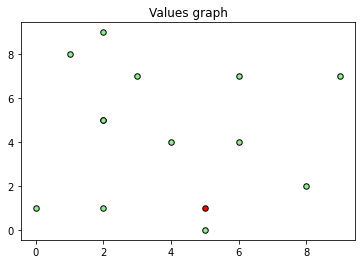

In [5]:
list_x = []
list_y = []

for i in range(len(dots)):
    if i == 10:
        plt.scatter([dots[i][0]],[dots[i][1]],
            marker='o',
            s=30,
            c='red',
            edgecolors='black')
        continue
    list_x.append(dots[i][0])
    list_y.append(dots[i][1])

plt.scatter(list_x,list_y,
           marker='o',
           s=30,
           c='lightgreen',
           edgecolors='black')

plt.title('Values graph')
plt.show()

In [6]:
# time window 계산
time_window = [
    (10, 500)
] * 40

time_window

[(10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500),
 (10, 500)]

In [7]:
def create_data_model():
    data = {}
    special_characters = ",\d*"
    relist = re.findall(special_characters, ',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39\n0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0\n1,323,0,243,277,158,277,287,339,304,205,268,243,329,329,271,327,277,378,304,320,243,363,309,323,327,297,220,215,384,471,313,384,245,313,313,313,312,373,335,316\n2,364,232,0,271,261,271,92,181,61,253,170,0,139,139,76,143,271,146,162,77,0,173,192,80,84,180,108,237,331,204,196,331,190,295,295,295,294,135,92,158\n3,547,269,228,0,627,0,291,379,301,454,136,245,118,118,275,116,0,382,197,317,245,369,392,302,304,380,194,110,536,434,396,536,156,123,123,123,170,335,308,107\n4,213,197,272,419,0,419,280,169,286,93,384,272,349,349,295,353,419,282,373,276,272,257,163,289,280,175,323,382,192,377,178,192,404,459,459,459,458,264,264,370\n5,565,229,245,0,355,0,291,379,301,454,136,245,118,118,275,116,0,382,197,317,245,369,392,302,304,380,194,110,536,434,396,536,156,123,123,123,170,335,308,107\n6,343,212,102,339,256,339,0,99,32,230,262,102,231,231,15,235,339,189,254,20,102,93,172,106,97,160,201,325,247,238,176,247,282,365,365,365,364,40,81,250\n7,295,149,203,358,196,358,111,0,117,134,370,203,335,335,126,339,358,130,359,107,203,88,122,120,111,110,302,426,147,225,98,147,390,395,395,395,394,95,95,356\n8,360,229,70,307,273,307,17,120,0,247,230,70,199,199,32,203,307,157,222,16,70,114,189,77,118,177,169,293,268,206,193,268,250,333,333,333,332,61,102,218\n9,214,256,287,434,105,434,221,110,227,0,398,287,363,363,236,367,434,240,387,217,287,198,70,230,221,82,338,455,133,335,85,133,418,474,474,474,473,205,205,384\n10,473,307,148,161,382,161,198,278,204,362,0,148,25,25,182,23,161,285,68,220,148,272,298,205,207,286,127,55,433,334,302,433,20,182,182,182,226,238,211,26\n11,350,219,0,236,263,236,79,131,57,237,159,0,128,128,63,132,236,138,151,73,0,125,179,58,60,167,98,222,279,187,183,279,179,262,262,262,261,91,64,147\n12,446,313,123,154,357,154,173,253,158,307,31,103,0,0,138,4,154,241,23,174,103,229,259,160,162,247,102,86,402,289,263,402,51,175,175,175,219,193,166,19\n13,420,295,103,154,317,154,154,231,158,307,31,103,0,0,138,4,154,241,23,174,103,229,259,160,162,247,102,86,402,289,263,402,51,175,175,175,219,193,166,19\n14,322,197,135,382,219,382,15,112,47,209,333,135,299,299,0,303,382,205,322,35,135,110,161,93,89,149,248,398,330,253,165,330,353,412,412,412,411,55,81,319\n15,422,297,105,150,319,150,156,233,160,309,27,105,2,2,140,0,150,243,19,176,105,231,261,162,164,249,104,82,404,291,265,404,47,171,171,171,215,195,168,15\n16,562,358,243,0,498,0,291,375,298,450,138,243,120,120,275,118,0,381,197,314,243,368,397,300,302,385,194,110,554,432,401,554,156,123,123,123,168,333,306,109\n17,548,372,186,433,407,433,201,209,169,344,387,186,352,352,216,356,433,0,376,185,186,190,332,138,140,320,299,449,394,111,308,394,407,467,467,467,466,150,144,373\n18,515,298,194,163,412,163,245,322,249,404,40,194,103,103,229,69,163,332,0,265,194,320,350,251,253,338,120,95,501,380,354,501,60,184,184,184,228,284,257,28\n19,343,218,104,351,240,351,35,106,16,230,299,104,268,268,50,272,351,174,291,0,104,79,182,87,83,170,217,367,277,222,186,277,319,381,381,381,380,49,75,287\n20,357,232,0,246,254,246,91,127,54,244,195,0,164,164,75,168,246,137,187,70,0,125,196,56,58,184,113,263,298,185,200,298,215,277,277,277,276,89,62,183\n21,371,231,159,404,261,404,88,70,89,205,359,159,324,324,103,328,404,149,348,73,157,0,192,78,71,180,259,382,225,242,168,225,339,425,425,425,424,52,59,307\n22,243,292,302,508,162,508,228,116,234,64,441,302,406,406,243,410,508,251,430,225,302,208,0,223,216,12,376,501,204,346,55,204,461,542,542,542,541,212,204,427\n23,377,235,79,314,261,314,69,71,75,206,241,79,210,210,84,214,314,141,233,93,79,66,194,0,3,182,181,304,227,198,170,227,261,345,345,345,344,39,8,229\n24,374,232,86,321,258,321,66,68,72,203,248,86,217,217,81,221,321,148,240,90,86,63,191,7,0,179,188,311,224,205,167,224,268,352,352,352,351,36,5,236\n25,266,277,290,513,161,513,216,104,222,76,446,290,411,411,231,415,513,239,435,213,290,196,12,211,204,0,381,506,255,334,43,255,466,547,547,547,546,200,192,433\n26,404,280,112,219,299,219,160,233,156,287,125,112,94,94,144,98,219,236,117,172,112,228,241,162,164,229,0,162,392,293,245,392,145,256,256,256,255,201,169,113\n27,481,253,197,141,389,141,248,306,252,366,51,197,68,68,232,66,141,309,87,268,197,301,314,258,260,302,138,0,496,366,318,496,46,210,210,210,229,297,265,57\n28,327,341,375,557,211,557,293,181,299,156,493,375,458,458,308,462,557,316,482,290,375,273,226,288,281,238,425,553,0,467,241,0,513,591,591,591,590,277,269,480\n29,541,415,204,440,436,440,247,249,205,387,373,204,338,338,268,342,440,100,362,221,204,244,374,178,180,362,306,429,374,0,348,374,393,474,474,474,473,182,185,359\n30,273,284,294,520,168,520,220,108,226,81,456,294,363,363,238,367,511,240,387,217,291,188,76,216,209,64,379,462,213,335,0,213,418,545,545,545,544,207,197,384\n31,331,335,383,569,216,569,330,184,336,160,496,383,461,461,345,465,569,317,485,324,383,295,230,323,316,242,437,562,0,412,245,0,516,603,603,603,602,314,304,483\n32,483,268,175,160,380,160,229,306,230,368,31,175,56,56,213,54,160,310,84,249,175,302,316,236,238,304,143,46,471,361,320,471,0,192,192,192,236,275,243,57\n33,634,377,332,112,532,112,381,469,388,520,191,332,173,173,365,171,112,469,259,404,332,462,468,395,398,456,306,244,634,523,472,634,211,0,0,0,56,434,403,162\n34,634,377,332,112,532,112,381,469,388,520,191,332,173,173,365,171,112,469,259,404,332,462,468,395,398,456,306,244,634,523,472,634,211,0,0,0,56,434,403,162\n35,634,377,332,112,532,112,381,469,388,520,191,332,173,173,365,171,112,469,259,404,332,462,468,395,398,456,306,244,634,523,472,634,211,0,0,0,56,434,403,162\n36,629,372,327,174,527,174,376,464,383,515,243,327,225,225,360,223,174,464,311,399,327,457,463,390,393,451,301,239,629,518,467,629,263,56,56,56,0,429,398,214\n37,364,224,129,359,261,359,40,85,46,217,278,129,247,247,55,251,359,195,270,64,129,46,201,54,47,189,227,349,237,246,184,237,298,391,391,391,390,0,35,266\n38,341,201,94,323,238,323,61,62,67,194,243,94,212,212,76,216,323,160,235,85,94,58,178,18,12,166,192,314,214,211,161,214,263,356,356,356,355,31,0,230\n39,429,265,113,135,326,135,168,241,164,312,29,113,11,11,152,9,135,244,97,188,113,236,247,170,172,235,114,74,408,295,251,408,49,156,156,156,200,209,177,0\n')
    original =[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [2, 0, 7, 4, 8, 4, 10, 8, 5, 7, 3, 7, 4, 13],
 [9, 7, 0, 3, 3, 9, 3, 3, 4, 10, 8, 6, 3, 6],
 [6, 4, 3, 0, 4, 8, 6, 4, 3, 9, 7, 5, 0, 9],
 [8, 8, 3, 4, 0, 12, 6, 2, 7, 13, 11, 9, 4, 9],
 [6, 4, 9, 8, 12, 0, 8, 12, 5, 5, 1, 5, 8, 11],
 [12, 10, 3, 6, 6, 8, 0, 6, 5, 7, 7, 3, 6, 3],
 [10, 8, 3, 4, 2, 12, 6, 0, 7, 13, 11, 9, 4, 9],
 [7, 5, 4, 3, 7, 5, 5, 7, 0, 6, 4, 2, 3, 8],
 [9, 7, 10, 9, 13, 5, 7, 13, 6, 0, 4, 4, 9, 6],
 [5, 3, 8, 7, 11, 1, 7, 11, 4, 4, 0, 4, 7, 10],
 [9, 7, 6, 5, 9, 5, 3, 9, 2, 4, 4, 0, 5, 6],
 [6, 4, 3, 0, 4, 8, 6, 4, 3, 9, 7, 5, 0, 9],
 [15, 13, 6, 9, 9, 11, 3, 9, 8, 6, 10, 6, 9, 0]]
    count = 0
    clist = []
    finalL = []
    for i in relist:
    
        count += 1
        num = i[1:]
        clist.append(int(num)/10)
        if count == 40:
            count = 0
            finalL.append(clist)
            print(len(clist))
            clist = []
#     print(len(original[1]))
    finalL = finalL[1:]
    data['service_time'] = tiem_to_service
    data['time_matrix'] = finalL
    data['time_windows'] = time_window
    data['num_vehicles'] = 3
    data['depot'] = 0
    return data

In [8]:
# Instance the data problem
data = create_data_model()

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40


In [9]:
# Create the routing index manager
manager = pywrapcp.RoutingIndexManager(len(data['time_matrix']),data['num_vehicles'], data['depot'])

In [10]:
# Create Routing Model.
routing = pywrapcp.RoutingModel(manager)

In [11]:
# Create and register a transit callback.
def time_callback(from_index, to_index):
    """Returns the travel time between the two nodes."""
    # Convert from routing variable Index to time matrix NodeIndex.
    from_node = manager.IndexToNode(from_index)
    to_node = manager.IndexToNode(to_index)
    return data['time_matrix'][from_node][to_node] + data['service_time'][from_node]

In [12]:
transit_callback_index = routing.RegisterTransitCallback(time_callback)

In [13]:
# Define cost of each arc.
routing.SetArcCostEvaluatorOfAllVehicles(transit_callback_index)# Define cost of each arc.

In [14]:
# Add Time Windows constraint.
time = 'Time'
routing.AddDimension(
    transit_callback_index,
    10,  # allow waiting time
    60,  # maximum time per vehicle
    False,  # Don't force start cumul to zero.
    time)
time_dimension = routing.GetDimensionOrDie(time)
# Add time window constraints for each location except depot.
for location_idx, time_window in enumerate(data['time_windows']):
    if location_idx == data['depot']:
        continue
    index = manager.NodeToIndex(location_idx)
    time_dimension.CumulVar(index).SetRange(time_window[0], time_window[1])
# Add time window constraints for each vehicle start node.
depot_idx = data['depot']
for vehicle_id in range(data['num_vehicles']):
    index = routing.Start(vehicle_id)
    time_dimension.CumulVar(index).SetRange(
        data['time_windows'][depot_idx][0],
        data['time_windows'][depot_idx][1])


In [15]:
# Instantiate route start and end times to produce feasible times.
for i in range(data['num_vehicles']):
    routing.AddVariableMinimizedByFinalizer(
        time_dimension.CumulVar(routing.Start(i)))
    routing.AddVariableMinimizedByFinalizer(
        time_dimension.CumulVar(routing.End(i)))

In [16]:
# Setting first solution heuristic.
search_parameters = pywrapcp.DefaultRoutingSearchParameters()
search_parameters.first_solution_strategy = (
    routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC)
search_parameters.time_limit.seconds = 30

In [17]:
solution = routing.SolveWithParameters(search_parameters)


In [18]:
def print_solution(data, manager, routing, solution):
    """Prints solution on console."""
    print(f'Objective: {solution.ObjectiveValue()}')
    time_dimension = routing.GetDimensionOrDie('Time')
    total_time = 0
    for vehicle_id in range(data['num_vehicles']):
        index = routing.Start(vehicle_id)
        plan_output = 'Route for vehicle {}:\n'.format(vehicle_id)
        while not routing.IsEnd(index):
            time_var = time_dimension.CumulVar(index)
            plan_output += '{0} Time({1},{2}) -> '.format(
                manager.IndexToNode(index), solution.Min(time_var),
                solution.Max(time_var))
            index = solution.Value(routing.NextVar(index))
        time_var = time_dimension.CumulVar(index)
        plan_output += '{0} Time({1},{2})\n'.format(manager.IndexToNode(index),
                                                    solution.Min(time_var),
                                                    solution.Max(time_var))
        plan_output += 'Time of the route: {}min\n'.format(
            solution.Min(time_var))
        print(plan_output)
        total_time += solution.Min(time_var)
    print('Total time of all routes: {}min'.format(total_time))

In [19]:
def print_solution_only_num():
    output = []
    for vehicle_id in range(data['num_vehicles']):
        Output = []
        index = routing.Start(vehicle_id)
        while not routing.IsEnd(index):
            Output.append(manager.IndexToNode(index))
            index = solution.Value(routing.NextVar(index))
        Output.append(manager.IndexToNode(index))  
        output.append(Output)
    print(output)


In [20]:
def print_solution_with_graph():
    list_x = []
    list_y = []

    for i in range(len(dots)):
        if i == 10:
            plt.scatter([dots[i][0]],[dots[i][1]],
                marker='o',
                s=30,
                c='red',
                edgecolors='black')
            continue
        list_x.append(dots[i][0])
        list_y.append(dots[i][1])

    plt.scatter(list_x,list_y,
               marker='o',
               s=30,
               c='lightgreen',
               edgecolors='black')

    plt.title('Values graph')

    

    color_list = ['green','blue','red']
    for vehicle_id in range(data['num_vehicles']):

        index = routing.Start(vehicle_id)
        index = solution.Value(routing.NextVar(index))
        previous_index = 0
        pre=dots[0]
        count = 0
        while not routing.IsEnd(index):
            if count == 0:
                pre=dots[index]
                index = solution.Value(routing.NextVar(index))
                previous_index = index
                count+=1
                continue
            
            now = dots[manager.IndexToNode(index)]
            plt.plot([pre[0],now[0]],[pre[1],now[1]],color_list[vehicle_id])
            pre = now
            previous_index = index
            index = solution.Value(routing.NextVar(index))
            if(routing.IsEnd(index)):
                plt.plot([now[0],0],[now[1],1],color=color_list[vehicle_id])


In [21]:
# Print solution on console.
if not solution:
    print("There is no solution.")
if solution:
    print_solution(data, manager, routing, solution)
#     print_solution_with_graph()
    print_solution_only_num()

Objective: 0
Route for vehicle 0:
0 Time(10,10) -> 0 Time(10,10)
Time of the route: 10min

Route for vehicle 1:
0 Time(10,10) -> 0 Time(10,10)
Time of the route: 10min

Route for vehicle 2:
0 Time(10,10) -> 39 Time(10,10) -> 38 Time(10,10) -> 37 Time(10,10) -> 36 Time(10,10) -> 35 Time(10,10) -> 34 Time(10,10) -> 33 Time(10,10) -> 32 Time(10,10) -> 31 Time(10,10) -> 30 Time(10,10) -> 29 Time(10,10) -> 28 Time(10,10) -> 27 Time(10,10) -> 26 Time(10,10) -> 25 Time(10,10) -> 24 Time(10,10) -> 23 Time(10,10) -> 22 Time(10,10) -> 21 Time(10,10) -> 20 Time(10,10) -> 19 Time(10,10) -> 18 Time(10,10) -> 17 Time(10,10) -> 16 Time(10,10) -> 15 Time(10,10) -> 14 Time(10,10) -> 13 Time(10,10) -> 12 Time(10,10) -> 11 Time(10,10) -> 10 Time(10,10) -> 9 Time(10,10) -> 8 Time(10,10) -> 7 Time(10,10) -> 6 Time(10,10) -> 5 Time(10,10) -> 4 Time(10,10) -> 3 Time(10,10) -> 2 Time(10,10) -> 1 Time(10,10) -> 0 Time(10,10)
Time of the route: 10min

Total time of all routes: 30min
[[0, 0], [0, 0], [0, 39, 38,

## 